Alpha (Intercept): 7000.490160
Beta (Slope): 292.567088
R-squared: 0.797782
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     386.6
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           8.68e-36
Time:                        14:45:05   Log-Likelihood:                -1333.3
No. Observations:                 100   AIC:                             2671.
Df Residuals:                      98   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

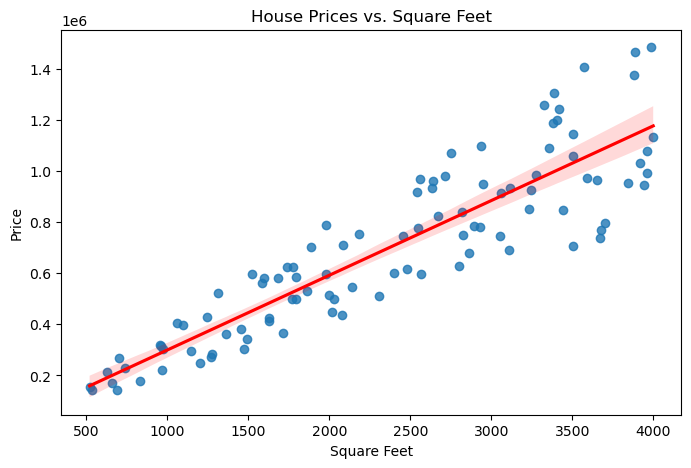

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Generate sample data
np.random.seed(42)
num_samples = 100
square_feet = np.random.randint(500, 4000, num_samples)  # Random house sizes in sqft
prices = square_feet * np.random.uniform(200, 400, num_samples)  # Price based on sqft with variance

# Create a DataFrame
df = pd.DataFrame({'Square Feet': square_feet, 'Price': prices})

# Define independent (X) and dependent (Y) variables
X = df["Square Feet"]  # Independent variable (house size)
Y = df["Price"]  # Dependent variable (house price)

# Add a constant to X for the intercept (Alpha)
X = sm.add_constant(X)

# Run Ordinary Least Squares (OLS) Regression
model = sm.OLS(Y, X).fit()

# Extract values
alpha = model.params["const"]  # Alpha (Intercept)
beta = model.params["Square Feet"]  # Beta (Slope)
r_squared = model.rsquared  # R-squared value

# Display results
print(f"Alpha (Intercept): {alpha:.6f}")
print(f"Beta (Slope): {beta:.6f}")
print(f"R-squared: {r_squared:.6f}")

# Show regression summary
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Square Feet"], y=df["Price"], line_kws={"color": "red"})
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("House Prices vs. Square Feet")
plt.show()


In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     386.6
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           8.68e-36
Time:                        14:46:38   Log-Likelihood:                -1333.3
No. Observations:                 100   AIC:                             2671.
Df Residuals:                      98   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7000.4902   3.83e+04      0.183      0.855   -6.91e+04    8.31e+04
Square Feet   292.5671     14.879     19.663      0.000     263.040     322.094
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.893
Skew:                           0.188   Prob(JB):                        0.640
Kurtosis:                       2.729   Cond. No.                     6.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""